In [155]:
import numpy as np
import corner
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%matplotlib inline
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"
rcParams["axes.labelsize"] = 25
mpl.rcParams['text.usetex'] = True


In [156]:
f220tau220=np.genfromtxt('/Users/richardbrito/Desktop/Projects/pEOBNRv2HM_tests/S190521g/qnmtest_abs_params_f_tau_modGR_data.dat', names=True)
imrexp30=np.genfromtxt('/Users/richardbrito/Desktop/Projects/pEOBNRv2HM_tests/S190521g/samples_EXP30.dat', names=True)

In [157]:
#using fitting formulas from https://arxiv.org/pdf/gr-qc/0512160.pdf to get final mass and final spin from omega220 and tau220. 
#See eqs.2.1, E1 and E2, and table VIII for fitting coefficients

Msun = 1.98847*10**30
G = 6.67408*10**(-11)
cc = 299792458

def Mjfinal220(omega220,tau220):
    
    jf=1-pow((omega220*tau220/2.-0.7)/(1.4187),-1/0.4990)
    Mf=((1.5251 - 1.1568*pow((1 - jf),0.1292))/omega220)*(pow(cc,3)/G/Msun)

    return Mf,jf

In [144]:
MJ=Mjfinal220(f220tau220['freq_modGR']*(2*np.pi),f220tau220['tau_modGR'])

In [158]:
mfaf=np.column_stack((MJ[0],MJ[1]))
np.savetxt('mfaf_modGR.dat', mfaf, delimiter='  ')

/Users/richardbrito/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


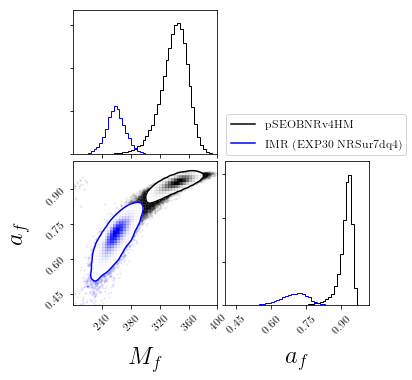

In [164]:
qnmmodes = np.vstack([mfaf[:,0],
                      mfaf[:,1]])

IMR = np.vstack([imrexp30['mf'],imrexp30['af']])


fig = corner.corner(np.transpose(IMR),
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='blue',truth_color='grey',bins=50,
                    plot_contours=True,levels=([0.95]),range=([200,400],[0.4,1.02]),
                    plot_datapoints=True)

corner.corner(np.transpose(qnmmodes),
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='black',bins=50,
                    plot_contours=True,levels=([0.9]),
                    range=([200,400],[0.4,1.02]),plot_datapoints=True,fig=fig)

red_line = mlines.Line2D([], [], color='black', label='pSEOBNRv4HM')
blue_line = mlines.Line2D([], [], color='blue', label='IMR (EXP30 NRSur7dq4)')

plt.legend(handles=[red_line,blue_line], bbox_to_anchor=(0.3, 1.0, 1., .0), loc=4)


fig.show()

In [160]:
Msun = 1.9885469549614615*10**30
G = 6.67408*10**(-11)
clight = 299792458

def omegaphys(Mf,af):
    
    f=(1.5251 - 1.1568*pow((1 - af),0.1292))/(2.*np.pi*Mf*Msun*G/(clight**2)/clight)
    tau=1/((1/2.)*(2.*np.pi*f/(0.7000 + 1.4187*pow((1 - af),-0.4990))))

    return f,tau

/Users/richardbrito/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


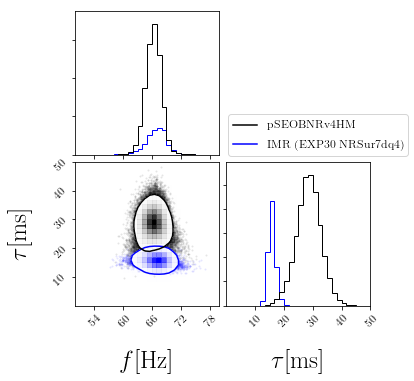

In [165]:
from matplotlib import rcParams
import matplotlib.lines as mlines

rcParams["font.size"] = 12
rcParams["font.family"] = "serif"
rcParams["axes.labelsize"] = 25

qnmmodes = np.vstack([f220tau220['freq_modGR'],1000*f220tau220['tau_modGR']])

IMR = np.vstack([(omegaphys(imrexp30['mf'],imrexp30['af'])[0]),
                     1000*(omegaphys(imrexp30['mf'],imrexp30['af'])[1])])

fig = corner.corner(np.transpose(IMR),
                    labels=[r'$f$[Hz]',
                            r'$\tau$[ms]'],
                    smooth=True,color='blue',bins=30,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=True,range=([50,80], [0,50]),truth_color='black')

corner.corner(np.transpose(qnmmodes),
                    labels=[r'$f$[Hz]',
                            r'$\tau$[ms]'],
                    smooth=True,hist_bin_factor=([2]),color='black',bins=30,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=True,range=([50,80], [0,50]),fig=fig)

red_line = mlines.Line2D([], [], color='black', label='pSEOBNRv4HM')
blue_line = mlines.Line2D([], [], color='blue', label='IMR (EXP30 NRSur7dq4)')

plt.legend(handles=[red_line,blue_line], bbox_to_anchor=(0.3, 1.0, 1., .0), loc=4)


fig.show()